<a href="https://colab.research.google.com/github/Pathway2008/CarPrice/blob/main/new_pre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [15]:
train = pd.read_csv('/content/drive/MyDrive/CarPrice/train.csv')
test = pd.read_csv('/content/drive/MyDrive/CarPrice/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/CarPrice/sample_submission.csv')

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57920 entries, 0 to 57919
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           57920 non-null  object 
 1   생산년도         57920 non-null  int64  
 2   모델출시년도       57920 non-null  int64  
 3   브랜드          57920 non-null  object 
 4   차량모델명        57920 non-null  object 
 5   판매도시         57920 non-null  object 
 6   판매구역         57920 non-null  object 
 7   주행거리         57920 non-null  int64  
 8   배기량          57920 non-null  int64  
 9   압축천연가스(CNG)  57920 non-null  int64  
 10  경유           57920 non-null  int64  
 11  가솔린          57920 non-null  int64  
 12  하이브리드        57920 non-null  int64  
 13  액화석유가스(LPG)  57920 non-null  int64  
 14  가격           57920 non-null  float64
dtypes: float64(1), int64(9), object(5)
memory usage: 6.6+ MB


In [38]:
train.describe()

,생산년도,모델출시년도,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
count,57920.000000,57920.000000,5.792000e+04,57920.000000,57920.000000,57920.000000,57920.000000,57920.000000,57920.000000,57920.000000
mean,2011.355352,2008.033408,1.678691e+05,1788.160135,0.000483,0.425242,0.517956,0.010290,0.046029,52.211752
std,5.174108,5.087963,8.319120e+04,545.413818,0.021982,0.494384,0.499682,0.100918,0.209550,35.399718
min,1978.000000,1983.000000,1.000000e+00,875.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.170000
25%,2008.000000,2004.000000,1.114345e+05,1461.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.570000
50%,2011.000000,2008.000000,1.710000e+05,1753.000000,0.000000,0.000000,1.000000,0.000000,0.000000,42.250000
75%,2016.000000,2012.000000,2.200000e+05,1995.000000,0.000000,1.000000,1.000000,0.000000,0.000000,73.970000
max,2022.000000,2021.000000,2.500000e+06,6300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,156.000000


In [17]:
thresholds = [0, 1000, 1600, 2000, float('inf')]
categories = ['light', 'small', 'medium', 'large']
train['size'] = pd.cut(train['배기량'], bins=thresholds, labels=categories, right=False)

In [54]:
thresholds = [0, 1000, 1600, 2000, float('inf')]
categories = ['light', 'small', 'medium', 'large']
test['size'] = pd.cut(test['배기량'], bins=thresholds, labels=categories, right=False)

In [55]:
test.head()

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),size
0,TEST_00000,2017,2013,mazda,3,KAL,WIE,57000,1998,0,0,1,0,0,medium
1,TEST_00001,2011,2008,ford,fiesta,ROP,POD,159000,1242,0,0,1,0,0,small
2,TEST_00002,2019,2017,volkswagen,polo,LOD,LOD,11284,999,0,0,1,0,0,light
3,TEST_00003,2021,2016,renault,megane,JAW,SLA,9,1332,0,0,1,0,0,small
4,TEST_00004,2010,2011,volvo,v60,WEJ,POM,270000,1999,0,0,1,0,0,medium


In [32]:
train['Difference_year'] = train['생산년도'] - train['모델출시년도']

In [ ]:
count_negative_difference = len(train[train['Difference_year'] < 0])
print("Number of rows with Difference_year < 0:", count_negative_difference)

In [ ]:
rows_with_negative_difference = train[train['Difference_year'] < 0]
rows_with_negative_difference

In [30]:
train.loc[train['Difference_year'] < 0, '생산년도'] = train.loc[train['Difference_year'] < 0, '모델출시년도']

In [59]:
test['Difference_year'] = test['생산년도'] - test['모델출시년도']

In [57]:
test.loc[test['Difference_year'] < 0, '생산년도'] = test.loc[test['Difference_year'] < 0, '모델출시년도']

In [36]:
train.head()

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격,size,Difference_year
0,TRAIN_00000,2018,2014,skoda,fabia,KAT,SLA,85231,999,0,0,1,0,0,51.74,light,4
1,TRAIN_00001,2010,2006,toyota,auris,RKO,SWI,135000,1598,0,0,1,0,0,41.47,small,4
2,TRAIN_00002,2002,2002,mercedes-benz,clk-klasa,GNI,WIE,255223,1796,0,0,1,0,0,17.81,medium,0
3,TRAIN_00003,2006,2001,nissan,x-trail,EHX,WIE,238000,2184,0,1,0,0,0,18.20,large,5
4,TRAIN_00004,2007,2007,fiat,bravo,OSW,MAL,251000,1910,0,1,0,0,0,17.55,medium,0


In [38]:
import matplotlib.pyplot as plt
import warnings
import matplotlib.font_manager as fm
warnings.filterwarnings('ignore')

In [40]:
!apt-get -qq install fonts-nanum
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

Selecting previously unselected package fonts-nanum.
(Reading database ... 123069 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


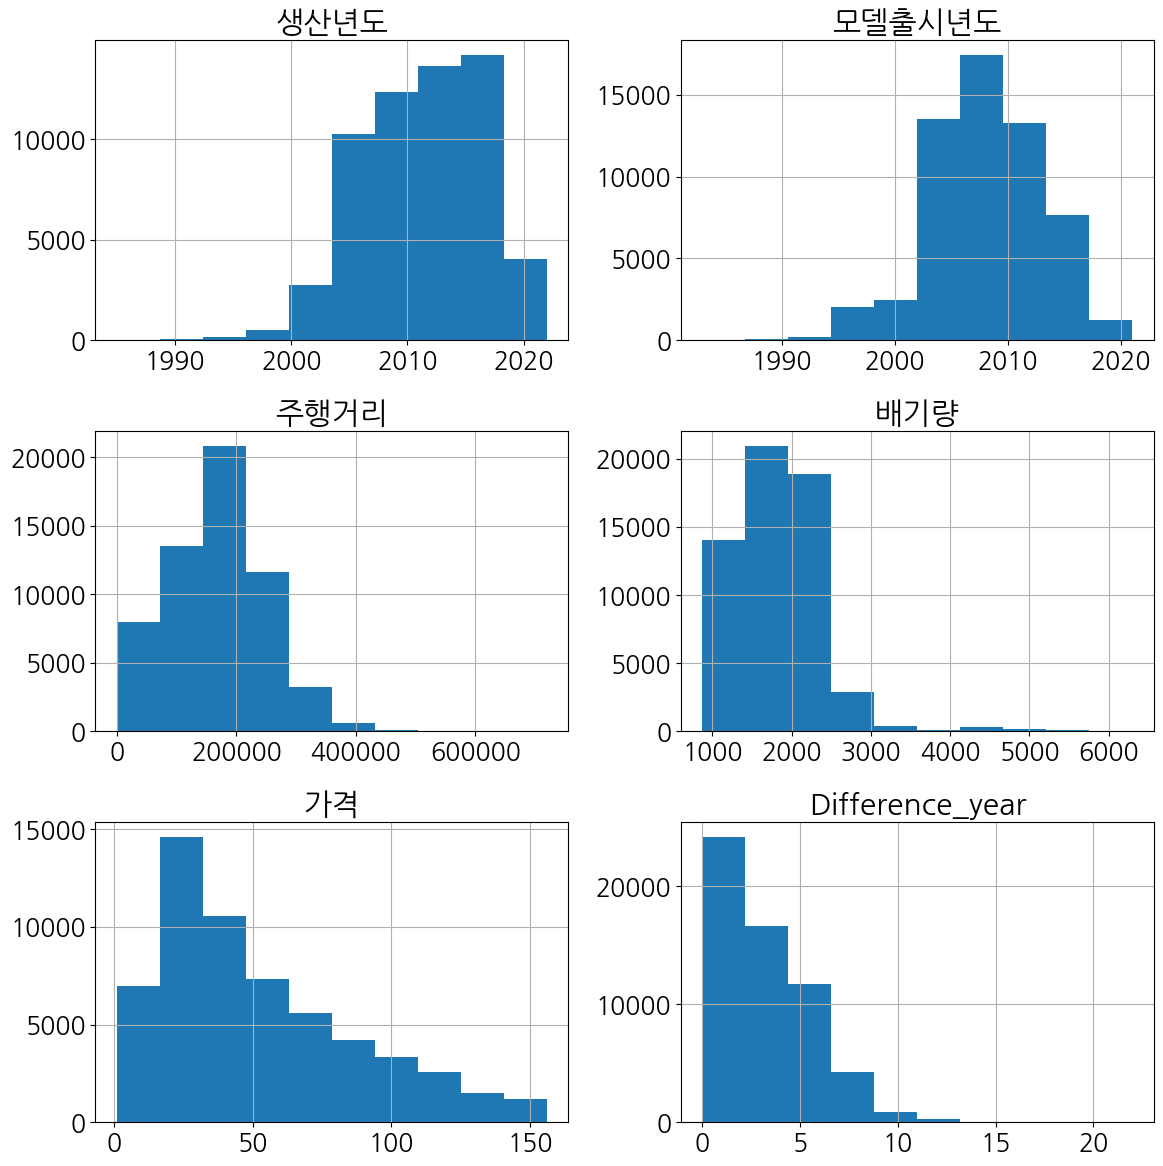

In [47]:
not_nominal = train[['생산년도','모델출시년도','주행거리','배기량','가격','Difference_year']]
not_nominal.hist(figsize = (12,12))
plt.tight_layout()
plt.show()

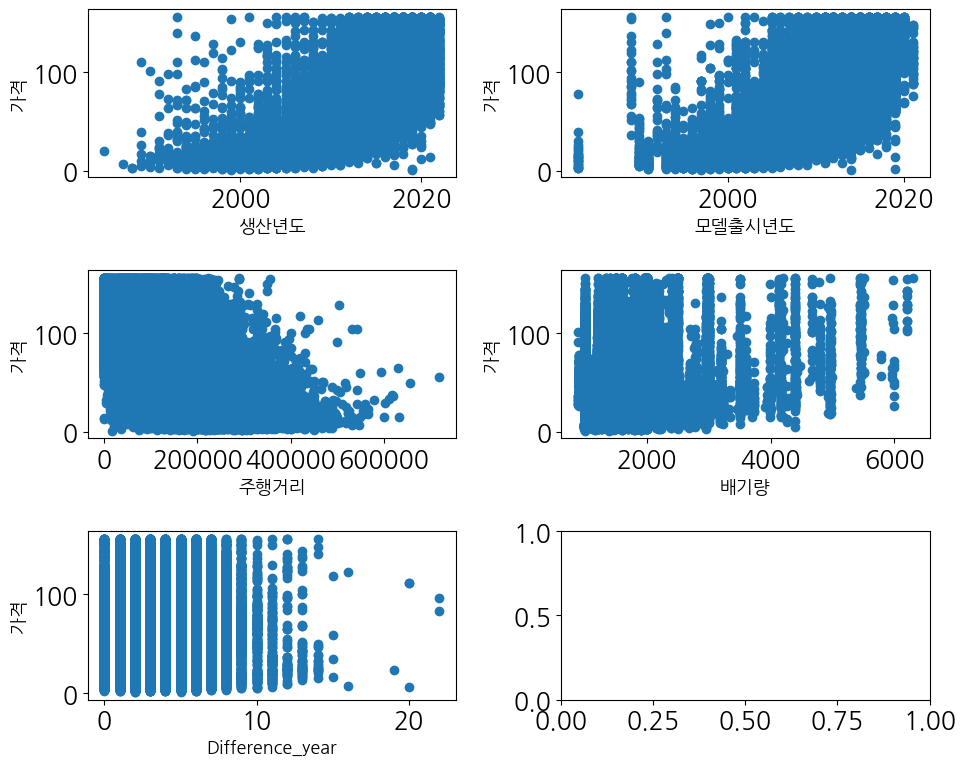

In [48]:
plt.rc('font',family='NanumGothic')
fig, axes = plt.subplots(3, 2, figsize=(10, 8))

# Scatter plot 1
axes[0, 0].scatter(x=train['생산년도'], y=train['가격'])
axes[0, 0].set_ylabel('가격', fontsize=13)
axes[0, 0].set_xlabel('생산년도', fontsize=13)

# Scatter plot 2
axes[0, 1].scatter(x=train['모델출시년도'], y=train['가격'])
axes[0, 1].set_ylabel('가격', fontsize=13)
axes[0, 1].set_xlabel('모델출시년도', fontsize=13)

# Scatter plot 3
axes[1, 0].scatter(x=train['주행거리'], y=train['가격'])
axes[1, 0].set_ylabel('가격', fontsize=13)
axes[1, 0].set_xlabel('주행거리', fontsize=13)

# Scatter plot 4
axes[1, 1].scatter(x=train['배기량'], y=train['가격'])
axes[1, 1].set_ylabel('가격', fontsize=13)
axes[1, 1].set_xlabel('배기량', fontsize=13)

# Scatter plot 5
axes[2, 0].scatter(x=train['Difference_year'], y=train['가격'])
axes[2, 0].set_ylabel('가격', fontsize=13)
axes[2, 0].set_xlabel('Difference_year', fontsize=13)

plt.tight_layout()
plt.show()

In [45]:
largest_values = train['주행거리'].nlargest(2).index
train = train.drop(largest_values)

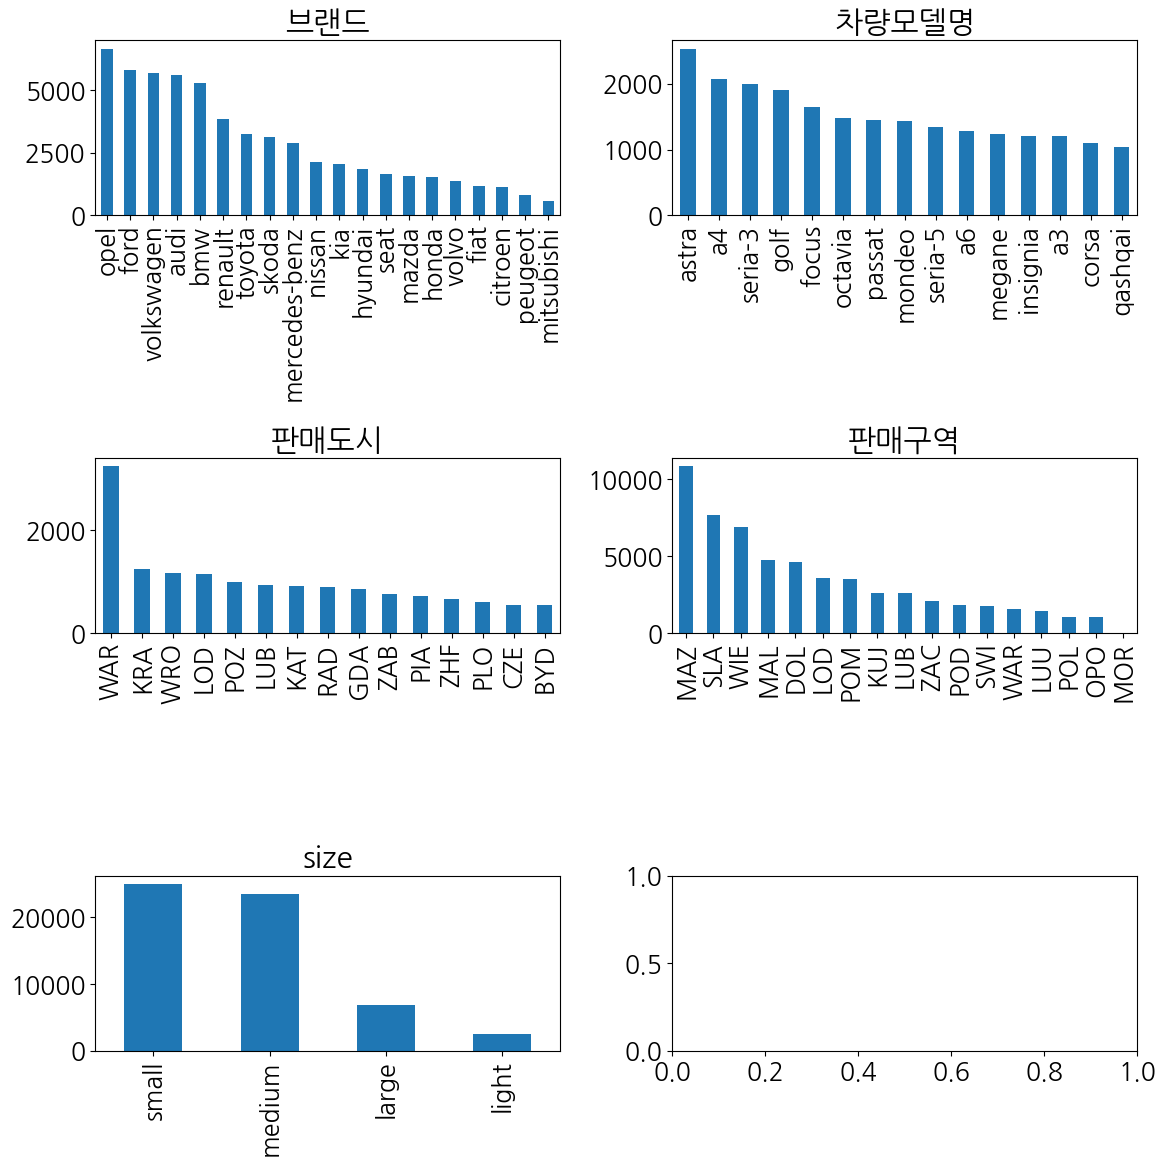

In [50]:
a = train['브랜드'].value_counts()
b = train['차량모델명'].value_counts().head(15)
c = train['판매도시'].value_counts().head(15)
d = train['판매구역'].value_counts()
e = train['size'].value_counts()
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

a.plot(kind='bar', ax=axs[0, 0])
b.plot(kind='bar', ax=axs[0, 1])
c.plot(kind='bar', ax=axs[1, 0])
d.plot(kind='bar', ax=axs[1, 1])
e.plot(kind='bar', ax=axs[2, 0])

axs[0, 0].set_title('브랜드')
axs[0, 1].set_title('차량모델명')
axs[1, 0].set_title('판매도시')
axs[1, 1].set_title('판매구역')
axs[2, 0].set_title('size')


plt.tight_layout()
plt.show()

In [51]:
corr = train.corr()
corr

,생산년도,모델출시년도,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격,Difference_year
생산년도,1.000000,0.901229,-0.639158,-0.311817,0.000121,0.062303,-0.033392,0.104569,-0.117695,0.754610,0.255560
모델출시년도,0.901229,1.000000,-0.581385,-0.285348,-0.001379,0.052314,-0.027417,0.108139,-0.109934,0.706190,-0.188635
주행거리,-0.639158,-0.581385,1.000000,0.392917,0.006916,0.344266,-0.367143,-0.091804,0.106704,-0.523117,-0.151390
배기량,-0.311817,-0.285348,0.392917,1.000000,-0.010586,0.253840,-0.265268,0.003371,0.033156,0.121216,-0.070028
압축천연가스(CNG),0.000121,-0.001379,0.006916,-0.010586,1.000000,-0.018917,-0.022798,-0.002241,-0.004831,-0.008791,0.003350
경유,0.062303,0.052314,0.344266,0.253840,-0.018917,1.000000,-0.891644,-0.087633,-0.188942,0.087398,0.024479
가솔린,-0.033392,-0.027417,-0.367143,-0.265268,-0.022798,-0.891644,1.000000,-0.105612,-0.227706,-0.065618,-0.014504
하이브리드,0.104569,0.108139,-0.091804,0.003371,-0.002241,-0.087633,-0.105612,1.000000,-0.022379,0.132647,-0.004283
액화석유가스(LPG),-0.117695,-0.109934,0.106704,0.033156,-0.004831,-0.188942,-0.227706,-0.022379,1.000000,-0.112631,-0.021458
가격,0.754610,0.706190,-0.523117,0.121216,-0.008791,0.087398,-0.065618,0.132647,-0.112631,1.000000,0.134589


In [52]:
from sklearn.preprocessing import LabelEncoder

In [61]:
ordinal_features = ['브랜드', '차량모델명', '판매도시', '판매구역','size']

for feature in ordinal_features:
    le = LabelEncoder()
    le = le.fit(train[feature])
    train[feature] = le.transform(train[feature])

    for label in np.unique(test[feature]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    test[feature] = le.transform(test[feature])

In [62]:
train.head() #size 1 = light, 2 = small, 3= medium, 0 = large

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격,size,Difference_year
0,TRAIN_00000,2018,2014,16,47,1214,12,85231,999,0,0,1,0,0,51.74,1,4
1,TRAIN_00001,2010,2006,17,20,2137,13,135000,1598,0,0,1,0,0,41.47,3,4
2,TRAIN_00002,2002,2002,9,36,785,15,255223,1796,0,0,1,0,0,17.81,2,0
3,TRAIN_00003,2006,2001,11,133,546,15,238000,2184,0,1,0,0,0,18.20,0,5
4,TRAIN_00004,2007,2007,3,25,1839,5,251000,1910,0,1,0,0,0,17.55,2,0


In [79]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.1 MB/s eta 0:00:00


In [80]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb

In [65]:
X = train.drop(['ID', '가격'], axis=1)
y = train['가격']

In [66]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = ["생산년도", "모델출시년도", "주행거리", "배기량",'Difference_year']

X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_valid[columns_to_scale] = scaler.transform(X_valid[columns_to_scale])
test[columns_to_scale] = scaler.transform(test[columns_to_scale])

In [81]:
gbrt_params = {'n_estimators': 489, 'learning_rate': 0.037666299375964746, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'subsample': 0.994817517319318}

In [82]:
xgb_params = {'booster': 'gbtree', 'eta': 0.09773787198485948, 'max_depth': 10, 'subsample': 0.6537116324250624, 'colsample_bytree': 0.9736768668296801, 'lambda': 2.571247074857165, 'alpha': 3.739545080324916e-05}

In [83]:
cat_params = {'boosting_type': 'Plain', 'iterations': 1674, 'learning_rate': 0.10573424441351864, 'depth': 8, 'l2_leaf_reg': 0.00026060065975250495, 'random_strength': 1.8409010826838174e-05, 'bagging_temperature': 0.01757564674119713, 'border_count': 113}

In [84]:
lgb_params =  {'num_leaves': 96, 'learning_rate': 0.09833136097882149, 'feature_fraction': 0.933552804860751, 'bagging_fraction': 0.7528646718210341, 'bagging_freq': 7, 'lambda_l1': 4.485925018221742, 'lambda_l2': 0.00010634446495247863}

In [85]:
rf_params =  {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 2}

In [86]:
gbrt_model = GradientBoostingRegressor(**gbrt_params)
xgb_model = xgb.XGBRegressor(**xgb_params)
catboost_model = CatBoostRegressor(**cat_params)
lgbm_model = lgb.LGBMRegressor(**lgb_params)
rf_model = RandomForestRegressor(**rf_params)
svr_model = SVR()
lasso_model = Lasso()
ridge_model = Ridge()

In [ ]:
xgboost_model = xgb_model.fit(X_train, y_train)
lightgb_model = lgbm_model.fit(X_train, y_train)
catboost_model = catboost_model.fit(X_train,y_train)
rf_model = rf_model.fit(X_train,y_train)
svr_model = svr_model.fit(X_train, y_train)
lasso_model = lasso_model.fit(X_train, y_train)
ridge_model = ridge_model.fit(X_train, y_train)
gbrt_model.fit(X_train, y_train)

In [88]:
#gbrt
pred = gbrt_model.predict(X_valid)
mae = mean_absolute_error(y_valid, pred)
print("gb_mae :", mae)

#lgb
pred = lightgb_model.predict(X_valid)
mae = mean_absolute_error(y_valid, pred)
print("lgb_mae :", mae)

#xgb
pred = lightgb_model.predict(X_valid)
mae = mean_absolute_error(y_valid, pred)
print("xgb_mae :", mae)

#cat
pred = catboost_model.predict(X_valid)
mae = mean_absolute_error(y_valid, pred)
print("cat_mae :", mae)

#RF
pred = rf_model.predict(X_valid)
mae = mean_absolute_error(y_valid, pred)
print("RF_mae :", mae)

#svr
pred = svr_model.predict(X_valid)
mae = mean_absolute_error(y_valid, pred)
print("svr_mae :", mae)

#ridge
pred = ridge_model.predict(X_valid)
mae = mean_absolute_error(y_valid, pred)
print("ridge_mae :", mae)

#Lasso
pred = lasso_model.predict(X_valid)
mae = mean_absolute_error(y_valid, pred)
print("lasso_mae : ", mae)

gb_mae : 5.891264414021713
lgb_mae : 6.194035588571894
xgb_mae : 6.194035588571894
cat_mae : 5.84733158260498
RF_mae : 7.732650513442895
svr_mae : 27.80636934729921
ridge_mae : 13.627063528049572
lasso_mae :  17.149821409014876
